# Extraer, Transformar y Cargar Datos usando Python

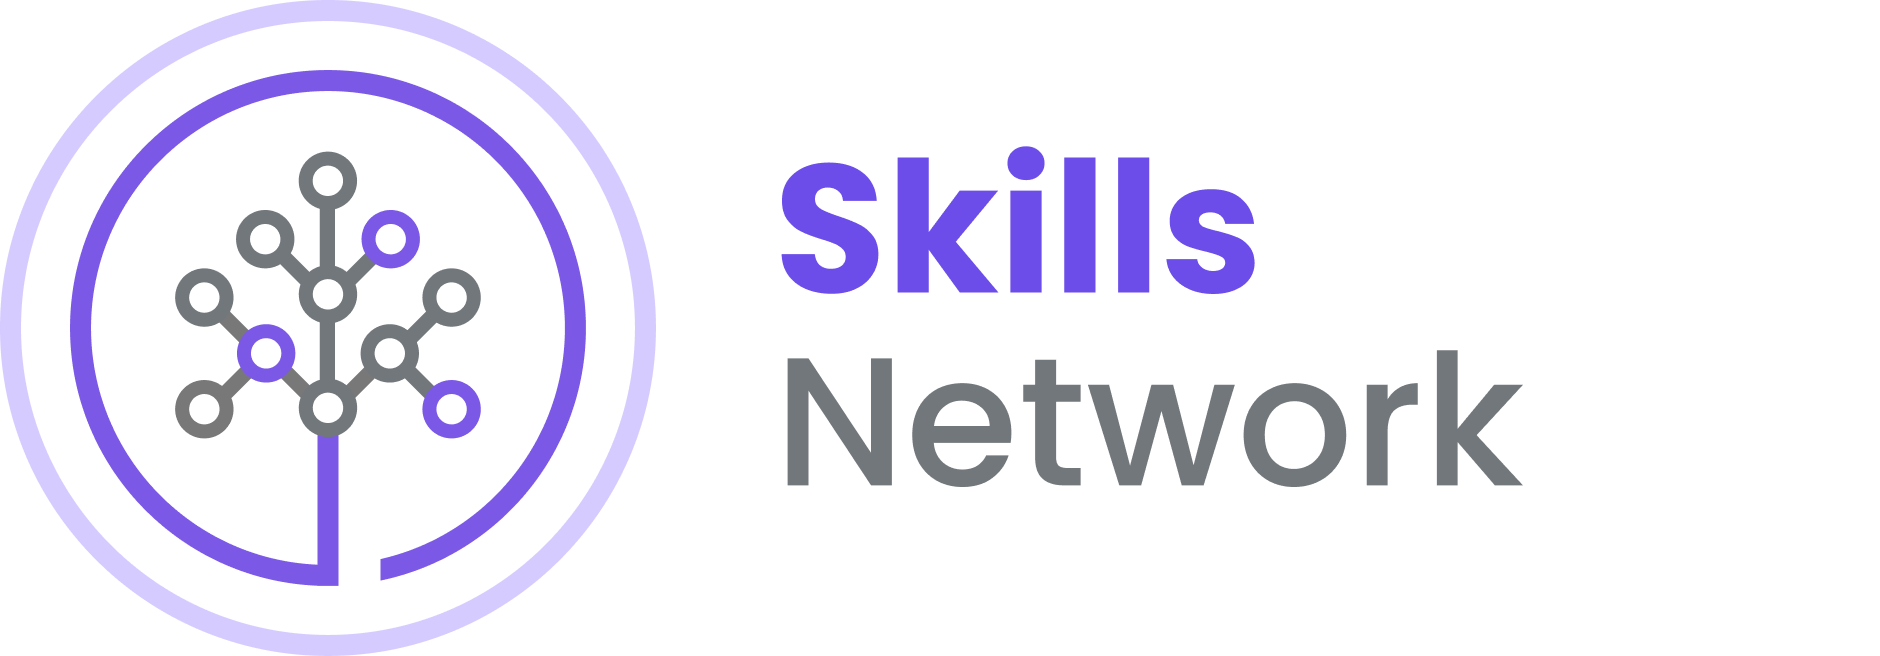

## Introducción
Las operaciones de Extraer, Transformar y Cargar (ETL) son de extrema importancia en el papel de un ingeniero de datos. Un ingeniero de datos extrae datos de múltiples fuentes y diferentes formatos de archivo, transforma los datos extraídos a configuraciones predefinidas y luego carga los datos en una base de datos para su posterior procesamiento. En este laboratorio, tendrás práctica práctica realizando estas operaciones.

Objetivos
Después de completar este laboratorio, podrás:

- Leer tipos de archivos CSV, JSON y XML.
- Extraer los datos requeridos de los diferentes tipos de archivos.
- Transformar los datos al formato requerido.
- Guardar los datos transformados en un formato listo para cargar, que se puede cargar en un RDBMS.


## Ejecuta los siguientes comandos en la terminal:

a. Descarga el archivo zip que contiene los datos requeridos en múltiples formatos.

```terminal
wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/source.zip
```
b b. Descomprime el archivo descargado.

```terminal
unzip source.zip

# Importando bibliotecas y configurando rutas
Los archivos requeridos ahora están disponibles en la carpeta project.

En este laboratorio, extraerás datos de formatos CSV, JSON y XML. Primero, necesitas importar las bibliotecas de Python adecuadas para utilizar las funciones relevantes.

La biblioteca xml se puede utilizar para analizar la información de un archivo en formato .xml. Los formatos de archivo .csv y .json se pueden leer utilizando la biblioteca pandas. Utilizarás la biblioteca pandas para crear un formato de marco de datos que almacenará los datos extraídos de cualquier archivo.

Para llamar a la función correcta para la extracción de datos, necesitas acceder a la información del formato del archivo. Para este acceso, puedes usar la biblioteca glob.

Para registrar la información correctamente, necesitas la fecha y la hora en el momento del registro. Para esta información, requieres el paquete datetime.

Mientras que glob, xml y datetime son características integradas de Python, necesitas instalar la biblioteca pandas en tu IDE.

Ejecuta el siguiente comando en una terminal para instalar pandas para python3.11.

Una vez que la instalación esté completa, puedes importar todas las bibliotecas en etl_code.py utilizando los siguientes comandos.

In [ ]:
import glob 
import pandas as pd 
import xml.etree.ElementTree as ET 
from datetime import datetime 



Tenga en cuenta que solo importa la función ElementTree de la biblioteca xml.etree porque necesita esa función para analizar los datos de un formato de archivo XML.

También necesita dos rutas de archivo que estarán disponibles globalmente en el código para todas las funciones. Estas son transformed_data.csv, para almacenar los datos de salida finales que puede cargar en una base de datos, y log_file.txt, que almacena todos los registros.

Introduzca estas rutas en el código agregando las siguientes declaraciones:

In [21]:
log_file = "log_file.txt" 
target_file = "transformed_data.csv" 

## Tarea 1: Extracción
A continuación, desarrollarás las funciones para extraer los datos de diferentes formatos de archivo. Como habrá diferentes funciones para los formatos de archivo, tendrás que escribir una función para cada uno de los tipos de archivo .csv, .json y .xml.

Puedes nombrar estas tres funciones como extract_from_csv(), extract_from_json() y extract_from_xml(). Necesitas pasar el archivo de datos como argumento, file_to_process, a cada función.

Para extraer de un archivo CSV, puedes definir la función extract_from_csv() de la siguiente manera utilizando la función read_csv de pandas:

In [20]:
def extract_from_csv(file_to_process): 
    dataframe = pd.read_csv(file_to_process) 
    return dataframe 

Para extraer de un archivo JSON, puedes definir la función extract_from_json() utilizando la función read_json de pandas. Requiere un argumento adicional lines=True para permitir que la función lea el archivo como un objeto JSON línea por línea de la siguiente manera.

In [24]:
def extract_from_json(file_to_process): 
    dataframe = pd.read_json(file_to_process, lines=True) 
    return dataframe 

To extract from an `XML` file, you need first to parse the data from the file using the `ElementTree` function. You can then extract relevant information from this data and append it to a pandas dataframe as follows.

> ### Note: Adding Data to DataFrames using `pd.concat`
> In this lab, we use `pd.concat` to append data to an existing DataFrame. This method is recommended because the `append` method is deprecated. `pd.concat` offers better efficiency and flexibility, especially when combining multiple DataFrames.
>
> **Why use `pd.concat`:**
> - `pd.concat` is more efficient when adding rows or combining multiple DataFrames.
> - It provides better control over the operation, allowing you to concatenate along rows or columns.
> - It also includes the `ignore_index=True` argument, which resets the index to avoid duplication when combining DataFrames.

**Example:**

In [7]:

import pandas as pd

# Create DataFrames
df1 = pd.DataFrame({'A': [1, 2], 'B': [3, 4]})
df2 = pd.DataFrame({'A': [5], 'B': [6]})

# Use concat
result = pd.concat([df1, df2], ignore_index=True)
print(df1)
print('-----------')
print(df2)
print('-----------')
print(result)

   A  B
0  1  3
1  2  4
-----------
   A  B
0  5  6
-----------
   A  B
0  1  3
1  2  4
2  5  6


**Note:** You must know the headers of the extracted data to write this function. In this data, you extract \"name\", \"height\", and \"weight\" headers for different persons.

This function can be written as follows:

In [12]:
def extract_from_xml(file_to_process): 
    dataframe = pd.DataFrame(columns=["name", "height", "weight"]) 
    tree = ET.parse(file_to_process) 
    root = tree.getroot() 
    for person in root: 
        name = person.find("name").text 
        height = float(person.find("height").text) 
        weight = float(person.find("weight").text) 
        dataframe = pd.concat([dataframe, pd.DataFrame([{"name":name, "height":height, "weight":weight}])], ignore_index=True) 
    return dataframe 

Now you need a function to identify which function to call on basis of the filetype of the data file. To call the relevant function, write a function `extract`, which uses the `glob` library to identify the filetype. This can be done as follows: 

In [13]:
def extract(): 
    extracted_data = pd.DataFrame(columns=['name','height','weight']) # create an empty data frame to hold extracted data 
     
    # process all csv files, except the target file
    for csvfile in glob.glob("*.csv"): 
        if csvfile != target_file:  # check if the file is not the target file
            extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_csv(csvfile))], ignore_index=True) 
         
    # process all json files 
    for jsonfile in glob.glob("*.json"): 
        extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_json(jsonfile))], ignore_index=True) 
     
    # process all xml files 
    for xmlfile in glob.glob("*.xml"): 
        extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_xml(xmlfile))], ignore_index=True) 
         
    return extracted_data 

## Task 2 - Transformation
The height in the extracted data is in inches, and the weight is in pounds. However, for your application, the height is required to be in meters, and the weight is required to be in kilograms, rounded to two decimal places. Therefore, you need to write the function to perform the unit conversion for the two parameters.

The name of this function will be transform(), and it will receive the extracted dataframe as the input. Since the dataframe is in the form of a dictionary with three keys, "name", "height", and "weight", each of them having a list of values, you can apply the transform function on the entire list at one go.

The function can be written as follows:

In [14]:
def transform(data): 
    '''Convert inches to meters and round off to two decimals 
    1 inch is 0.0254 meters '''
    data['height'] = round(data.height * 0.0254,2) 
 
    '''Convert pounds to kilograms and round off to two decimals 
    1 pound is 0.45359237 kilograms '''
    data['weight'] = round(data.weight * 0.45359237,2) 
    
    return data 

The output of this function will now be a dataframe where the "height" and "weight" parameters will be modified to the required format.

# Task 3 - Loading and Logging
You need to load the transformed data to a CSV file that you can use to load to a database as per requirement.

To load the data, you need a function load_data() that accepts the transformed data as a dataframe and the target_file path. You need to use the to_csv attribute of the dataframe in the function as follows:

In [15]:
def load_data(target_file, transformed_data): 
    transformed_data.to_csv(target_file) 

Finally, you need to implement the logging operation to record the progress of the different operations. For this operation, you need to record a message, along with its timestamp, in the log_file.

To record the message, you need to implement a function log_progress() that accepts the log message as the argument. The function captures the current date and time using the datetime function from the datetime library. The use of this function requires the definition of a date-time format, and you need to convert the timestamp to a string format using the strftime attribute. The following code creates the log operation:

In [18]:
def log_progress(message): 
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second 
    now = datetime.now() # get current timestamp 
    timestamp = now.strftime(timestamp_format) 
    with open(log_file,"a") as f: 
        f.write(timestamp + ',' + message + '\n') 

After you add these functions to etl_code.py, you will complete the implementation of the loading and logging operations. With this, all the functions for Extract, Transform, and Load (ETL) are ready for testing.

## Testing ETL operations and log progress
Now, test the functions you have developed so far and log your progress along the way. Insert the following lines into your code to complete the process. Note the comments on every step of the code.

In [25]:
# Log the initialization of the ETL process 
log_progress("ETL Job Started") 
 
# Log the beginning of the Extraction process 
log_progress("Extract phase Started") 
extracted_data = extract() 
 
# Log the completion of the Extraction process 
log_progress("Extract phase Ended") 
 
# Log the beginning of the Transformation process 
log_progress("Transform phase Started") 
transformed_data = transform(extracted_data) 
print("Transformed Data") 
print(transformed_data) 
 
# Log the completion of the Transformation process 
log_progress("Transform phase Ended") 
 
# Log the beginning of the Loading process 
log_progress("Load phase Started") 
load_data(target_file,transformed_data) 
 
# Log the completion of the Loading process 
log_progress("Load phase Ended") 
 
# Log the completion of the ETL process 
log_progress("ETL Job Ended") 

Transformed Data
     name  height  weight
0    alex    1.67   51.25
1    ajay    1.82   61.91
2   alice    1.76   69.41
3    ravi    1.73   64.56
4     joe    1.72   65.45
5    alex    1.67   51.25
6    ajay    1.82   61.91
7   alice    1.76   69.41
8    ravi    1.73   64.56
9     joe    1.72   65.45
10   alex    1.67   51.25
11   ajay    1.82   61.91
12  alice    1.76   69.41
13   ravi    1.73   64.56
14    joe    1.72   65.45
15   jack    1.74   55.93
16    tom    1.77   64.18
17  tracy    1.78   61.90
18   john    1.72   50.97
19   jack    1.74   55.93
20    tom    1.77   64.18
21  tracy    1.78   61.90
22   john    1.72   50.97
23   jack    1.74   55.93
24    tom    1.77   64.18
25  tracy    1.78   61.90
26   john    1.72   50.97
27  simon    1.72   50.97
28  jacob    1.70   54.73
29  cindy    1.69   57.81
30   ivan    1.72   51.77
31  simon    1.72   50.97
32  jacob    1.70   54.73
33  cindy    1.69   57.81
34   ivan    1.72   51.77
35  simon    1.72   50.97
36  jacob    1.70   5

C:\Users\dg_su\AppData\Local\Temp\ipykernel_21112\114048372.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_csv(csvfile))], ignore_index=True)
C:\Users\dg_su\AppData\Local\Temp\ipykernel_21112\2394561360.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataframe = pd.concat([dataframe, pd.DataFrame([{"name":name, "height":height, "weight":weight}])], ignore_index=True)
C:\Users\dg_su\AppData\Local\Temp\ipykernel_21112\2

<details><summary>Click here for the solution</summary>

## Lab Solution
In case you face some issue while you execute the created code, it might be because of missing a step in the process somewhere. The complete code of all the steps is given below to help you resolve the issue. Please note that you should refer to this only if you are unable to achieve the desired results yourself or get an error during the execution in the next step.

```python
import glob 
import pandas as pd 
import xml.etree.ElementTree as ET 
from datetime import datetime 
  
log_file = "log_file.txt" 
target_file = "transformed_data.csv" 
  
def extract_from_csv(file_to_process): 
    dataframe = pd.read_csv(file_to_process) 
    return dataframe 
  
def extract_from_json(file_to_process): 
    dataframe = pd.read_json(file_to_process, lines=True) 
    return dataframe 
  
def extract_from_xml(file_to_process): 
    dataframe = pd.DataFrame(columns=["name", "height", "weight"]) 
    tree = ET.parse(file_to_process) 
    root = tree.getroot() 
    for person in root: 
        name = person.find("name").text 
        height = float(person.find("height").text) 
        weight = float(person.find("weight").text) 
        dataframe = pd.concat([dataframe, pd.DataFrame([{"name":name,"height":height, "weight":weight}])], ignore_index=True) 
    return dataframe 
  
def extract(): 
    extracted_data = pd.DataFrame(columns=['name','height','weight'])  # create an empty data frame to hold extracted data
     
    # process all csv files, except the target file
    for csvfile in glob.glob("*.csv"): 
        if csvfile != target_file:  # check if the file is not the target file
            extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_csv(csvfile))], ignore_index=True) 
         
    # process all json files 
    for jsonfile in glob.glob("*.json"): 
        extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_json(jsonfile))], ignore_index=True) 
     
    # process all xml files 
    for xmlfile in glob.glob("*.xml"): 
        extracted_data = pd.concat([extracted_data, pd.DataFrame(extract_from_xml(xmlfile))], ignore_index=True) 
         
    return extracted_data 
  
def transform(data): 
    # Convert inches to meters and round off to two decimals 
    # 1 inch is 0.0254 meters 
    data['height'] = round(data.height * 0.0254,2) 
     
    # Convert pounds to kilograms and round off to two decimals 
    # 1 pound is 0.45359237 kilograms 
    data['weight'] = round(data.weight * 0.45359237,2) 
     
    return data 
  
def load_data(target_file, transformed_data): 
    transformed_data.to_csv(target_file) 
  
def log_progress(message): 
    timestamp_format = '%Y-%h-%d-%H:%M:%S' # Year-Monthname-Day-Hour-Minute-Second 
    now = datetime.now() # get current timestamp 
    timestamp = now.strftime(timestamp_format) 
    with open(log_file,"a") as f: 
        f.write(timestamp + ',' + message + '\n') 
  
# Log the initialization of the ETL process 
log_progress("ETL Job Started") 
  
# Log the beginning of the Extraction process 
log_progress("Extract phase Started") 
extracted_data = extract() 
  
# Log the completion of the Extraction process 
log_progress("Extract phase Ended") 
  
# Log the beginning of the Transformation process 
log_progress("Transform phase Started") 
transformed_data = transform(extracted_data) 
print("Transformed Data") 
print(transformed_data) 
  
# Log the completion of the Transformation process 
log_progress("Transform phase Ended") 
  
# Log the beginning of the Loading process 
log_progress("Load phase Started") 
load_data(target_file,transformed_data) 
  
# Log the completion of the Loading process 
log_progress("Load phase Ended") 
  
# Log the completion of the ETL process 
log_progress("ETL Job Ended") 

```
</details>

## Practice Exercises
Follow the process learned in this lab to perform ETL operations on the data available in the link below.

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0221EN-SkillsNetwork/labs/module%206/Lab%20-%20Extract%20Transform%20Load/data/datasource.zip 

Complete the following practice exercises:

1. Create a folder data_source and use the terminal shell to change the current directory to \home\project\data_source. Create a file etl_practice.py in this folder.

2. Download and unzip the data available in the link shared above.

3. The data available has four headers: 'car_model', 'year_of_manufacture', 'price', 'fuel'. Implement the extraction process for the CSV, JSON, and XML files.

4. Transform the values under the 'price' header such that they are rounded to 2 decimal places.

5. Implement the loading function for the transformed data to a target file, transformed_data.csv.

6. Implement the logging function for the entire process and save it in log_file.txt.

7. Test the implemented functions and log the events as done in the lab.

Please note that the solutions for this practice exercise are not provided to motivate you to try them yourself. However, feel free to share your opinions on the solutions as well as your questions in the discussion forums.

## Conclusion
In this lab, you practiced the implementation of:

- Extraction of data from CSV, JSON, and XML file formats.

- Transformation of data as per requirement.

- Loading the transformed data to a CSV file.

- Logging the progress of the said operations.